# Polynomial Regression to simulate outbreak

#### Author: Yiran Jing

#### Date: Feb 2020


## Contents:
1. EDA and Feature Engineering
1. Polynomial regression
   1. Chinese total comfirmed cases
   2. For each province
   
## Summary
For Polynomial regression, 
- China total comfirmed cases, optimal degree is 2, and seems fit well.
- Hubei, optimal degree is 2.
- Ex-hubei, optimal degree is 3.

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd
import pandas
import datetime
import matplotlib.dates as mdates
from helper_fun_model import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [17]:
%%time
## Update data from DXY
! cd ../data_processing && python DXY_AreaData_query.py

2020-02-12 21:39:55Update records successfully to ../data/DXY_Chinese.csv
Save area daily dataset (English) into ../data/DXYArea.csv
CPU times: user 110 ms, sys: 38.5 ms, total: 148 ms
Wall time: 8.63 s


In [18]:
## Load data 
df = pd.read_csv("../data/DXYArea.csv")
"""
Data Cleaning 
"""
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] != df['date'].max()] # remove todays' records (since it can be incompleted)
#df = df[df['date'] < datetime.datetime(2020, 2, 10)]

df.tail(3) # check new

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
6429,2020-02-11,泰国,TH,NaN,NaN,32,0,10,0,65,22
6430,2020-02-11,美国,US,NaN,NaN,13,0,3,0,65,10
6431,2020-02-11,越南,VN,NaN,NaN,15,0,3,0,65,12


### EDA

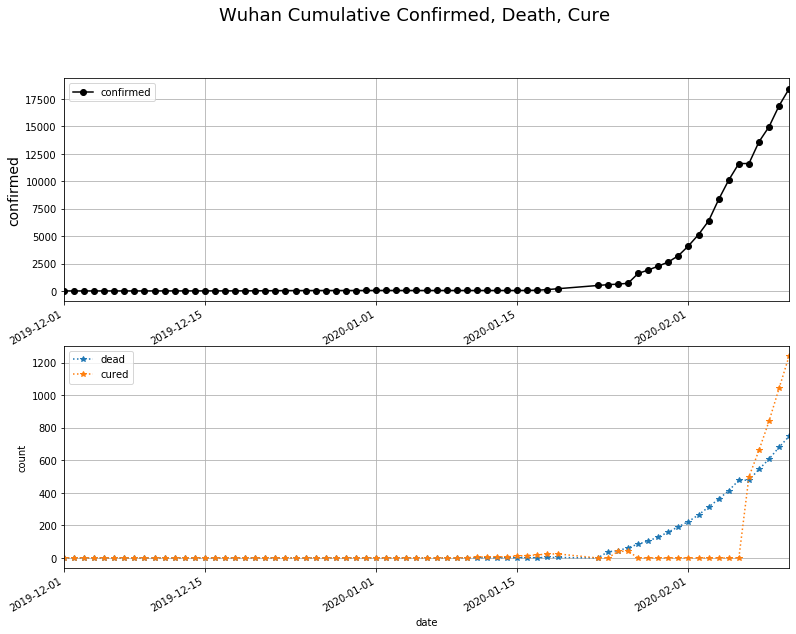

In [19]:
# Input City name or Province name
draw_city_trend("Wuhan", df) # city 

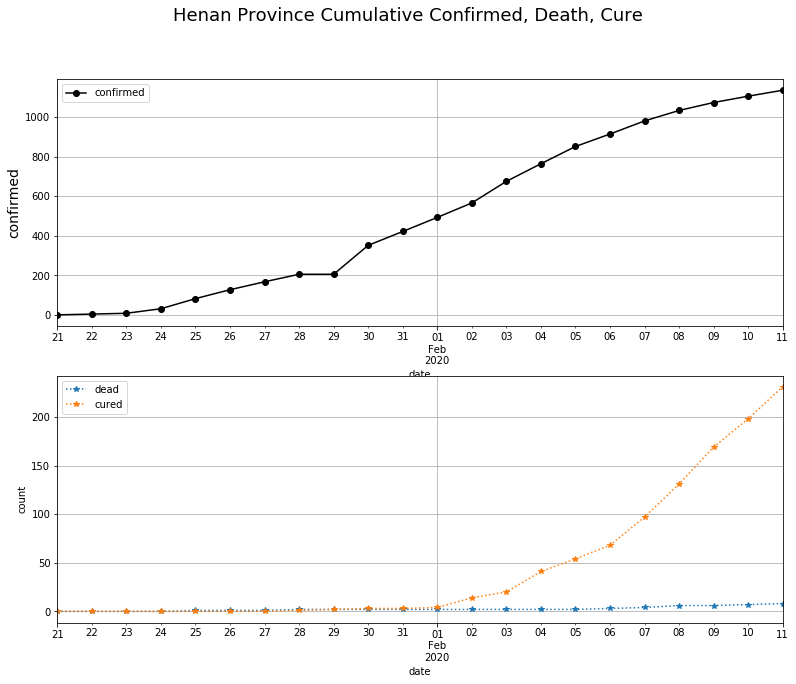

In [20]:
draw_province_trend("Henan Province", get_province_df(df, "Henan Province"))

## Polynomial regression

### Case1: Overall China

In [21]:
"""
Sum up all province within China
"""
# China total
China_df = df[df['date'] > datetime.datetime(2020, 1, 14)] 

China_total = get_China_total(China_df)

Train, Test = split_train_test_by_date(China_total, 5)

X_train = Train['Days']
y_train = Train['confirmed']
X_test =  Test['Days']
y_test = Test['confirmed']

Train dataset: data before 2020-02-06 00:00:00 
Test dataset: the last 5 days


In [29]:
China_total.tail(2)

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
5746,2020-02-10,中国,CN,NaN,NaN,42708,21675,3998,1017,64,37693
6091,2020-02-11,中国,CN,NaN,NaN,44730,16067,4742,1114,65,38874


Degree 1:
RMSE of training set is 3804.3175564109965
R2 score of training set is 0.8008503137363993
MAPE of training set is 14.996427395051835

RMSE of test set is 14881.456406064708
R2 score of test set is -9.192055737176164
MAPE of test set is 0.37837484771080465
---------------------------------------

Degree 3:
RMSE of training set is 200.84734328799127
R2 score of training set is 0.9994449165402268
MAPE of training set is 0.48631063926041374

RMSE of test set is 9958.060085318873
R2 score of test set is -3.5637348253889147
MAPE of test set is 0.20132176433828097
---------------------------------------

Degree 2:
RMSE of training set is 713.4671294757671
R2 score of training set is 0.9929955499564967
MAPE of training set is 3.107004107017541

RMSE of test set is 3091.384470434872
R2 score of test set is 0.5601779900272374
MAPE of test set is 0.05580874509041659
---------------------------------------



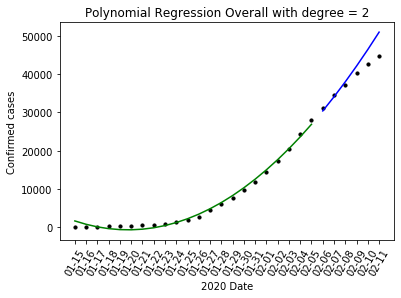

In [23]:
"""
Model selection:
  find optimal degree level
  Then draw plot using the optimal degree
"""
# select the best degree 
create_polynomial_regression_model(1, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Overall", China_total , X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = True)

**based on the result above, we can clearly see that degree = 2 gives us best estimation. So now we use degree = 2 to predict the next 4 days**


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 1145.8632968252962
R2 score of training set is 0.9942575844481755
MAPE of training set is 1.4749213603223013

---------------------------------------



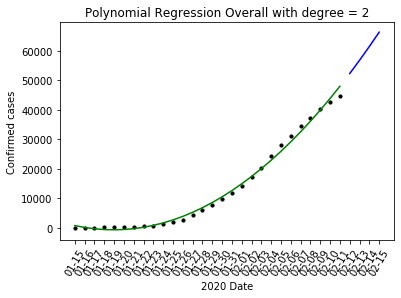

In [24]:
print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Overall", China_total)

### Case2: Each Province

Train dataset: data before 2020-02-06 00:00:00 
Test dataset: the last 5 days
Degree 1:
RMSE of training set is 2811.4512232838883
R2 score of training set is 0.7642664021237235
MAPE of training set is 10.9636648936541

RMSE of test set is 12704.60651256995
R2 score of test set is -9.739996239672344
MAPE of test set is 0.4383884578809126
---------------------------------------

Degree 3:
RMSE of training set is 141.49271585756296
R2 score of training set is 0.9994029254725938
MAPE of training set is 0.2775854561697488

RMSE of test set is 7739.1914390369775
R2 score of test set is -2.9854087627147403
MAPE of test set is 0.2079811364065367
---------------------------------------

Degree 2:
RMSE of training set is 739.8601980603485
R2 score of training set is 0.9836747550225396
MAPE of training set is 3.0534798933447447

RMSE of test set is 1292.5025039497357
R2 score of test set is 0.8888410391189937
MAPE of test set is 0.04317794755203421
---------------------------------------



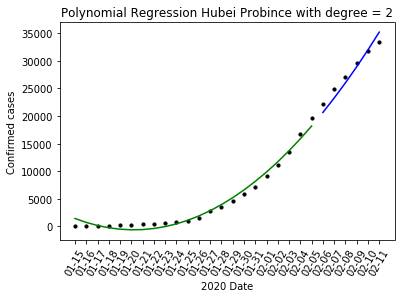


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 876.2761298507988
R2 score of training set is 0.993783651248281
MAPE of training set is 2.143709979066113

---------------------------------------



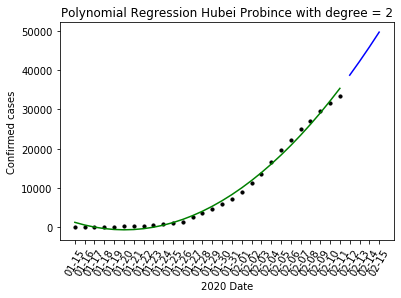

In [25]:
# See Hubei Province 
Hubei= get_province_df(China_df, "Hubei Province")
 
X_train, X_test, y_train, y_test = data_processing(Hubei, 5)    

# select the best degree 
create_polynomial_regression_model(1, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = True)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Hubei Probince", Hubei)

Train dataset: data before 2020-02-06 00:00:00 
Test dataset: the last 5 days
Degree 1:
RMSE of training set is 3804.3175564109965
R2 score of training set is 0.8008503137363993
MAPE of training set is 14.996427395051835

RMSE of test set is 14881.456406064708
R2 score of test set is -9.192055737176164
MAPE of test set is 0.37837484771080465
---------------------------------------

Degree 3:
RMSE of training set is 200.84734328799127
R2 score of training set is 0.9994449165402268
MAPE of training set is 0.48631063926041374

RMSE of test set is 9958.060085318873
R2 score of test set is -3.5637348253889147
MAPE of test set is 0.20132176433828097
---------------------------------------

Degree 2:
RMSE of training set is 713.4671294757671
R2 score of training set is 0.9929955499564967
MAPE of training set is 3.107004107017541

RMSE of test set is 3091.384470434872
R2 score of test set is 0.5601779900272374
MAPE of test set is 0.05580874509041659
---------------------------------------



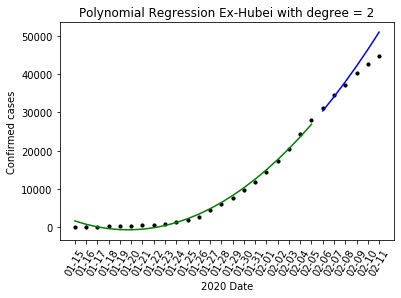


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 1145.8632968252962
R2 score of training set is 0.9942575844481755
MAPE of training set is 1.4749213603223013

---------------------------------------



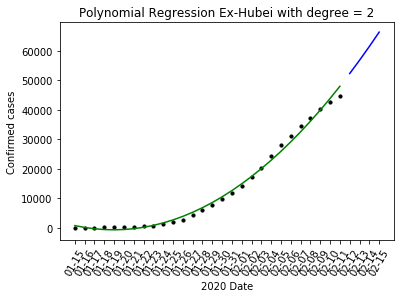

In [28]:
# See Hubei Province 
NotHubei= China_df[(China_df['province']!="Hubei Province") & (China_df['province'].isnull()) 
                   & (df['countryCode']=='CN') ]


X_train, X_test, y_train, y_test = data_processing(NotHubei, 5)    

# select the best degree 
create_polynomial_regression_model(1, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = True)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Ex-Hubei", NotHubei)